# Phase Estimation

## Overview

- Type: Estimation task, subroutine
- Time complexity: $O(1/\epsilon)$ (Heisenberg limited), or $O(1/\epsilon^2)$ (shot-noise limited) in the general setting. 
- Qubit complexity: $O(1)$ (iterative) or $O(\log 1/\epsilon)$ (non-iterative)
- Approachability: Medium
- Related topics: Phase kickback, Shor's algorithm, Optical interferometry, Quantum Fourier Transform
- Applications: Factoring, eigenvalue estimation, solving linear systems, amplitude estimation, physics and chemistry, discrete logarithm. 

In quantum computing, *phase estimation* refers to the task of estimating of the eigenvalue of a unitary operator, given an eigenvector. Computational routines which accomplish this task are known as *phase estimation procedures*, or *algorithms*. In practice, the term *phase estimation* refers interchangeably to either the problem or the procedure. 

## Problem statement

For a unitary operation $U$, and associated eigenvector $\vert u \rangle$, there is a $\theta \in [0,1)$ such that

$$
U \vert u \rangle = e^{2\pi i \theta} \vert u \rangle.
$$

Given oracular access to a unitary $U$, controlled versions thereof, and an eigenvector $\vert u \rangle$ prepared on a quantum register to fidelity $F$, determine $\theta$ to precision $\epsilon$. We refer to $\theta$ as the *phase*. 

### Extensions and relaxations

When the initial state is not an eigenstate $\vert u\rangle$ but rather a superposition $\sum_i c_i \vert u_i\rangle$ thereof, many phase estimation algorithms will still work, in the sense that they will return (with high probability) an estimate of the phase $\theta_i$ of $\vert u_i\rangle$ with probability $\vert c_i\vert^2$. We will call such algorithms "coherent". Those which only work on an approximate eigenstate will be termed "incoherent." Incoherent phase estimation algorithms, though less powerful, typically have the advantage of lower circuit depths. 

## Phase estimation algorithms

We briefly discuss classical algorithms for phase estimation, then list several major quantum phase estimation algorithms which will be the focus of the rest of this article. Note that the term "algorithm" here is slightly misplaced, since the phase estimation problem contains black boxes that are not fully specified. (Nielsen and Chuang)

### Classical algorithms

Assuming oracular access to the entries of $U$ and $\vert u\rangle$, standard matrix multiplication $U \vert u\rangle$ may be used to compute the eigenvalue. In fact, only the first entry of the output needs to be computed. However, for an input vector of size $2^n$, we still require an exponential number of oracle calls and arithmetic operations. Thus, in the generic case, this procedure will take exponential time. Moreover, the entries will need to be known exponentially precisely in order to obtain an estimate of $\theta$ to fixed precision.

### Quantum algorithms

There are many Quantum Phase Estimation Algorithms (QPEAs), all of which share similar features (recall that a quantum algorithm is an algorithm using quantum resources in *at least one part* of the computation).  In this article we will focus on the following incomplete list.  

- Standard Quantum Phase Estimation 
- QPE via Hadamard Test, a.k.a. Hadamard Phase Estimation
- Kitaev Phase Estimation
- Fast Phase Estimation (Svore, Hastings, Freedman)
- Bayesian Phase Estimation

All but the simplest PEAs achieve a $O(1/\epsilon)$ scaling in precision $\epsilon$, which is provably optimal in the general setting. For special cases in which powers of $U$ are efficiently computable (e.g., through repeated squaring of a reversible classical operation), this scaling can be improved further. Shor's period finding algorithm is an important case.

Crucially, $U$ is represented by $n$ qubits rather than an exponentially large number of bits. While not all $n$ qubit unitaries can be simulated efficiently important subclasses of unitaries can be written as an efficient quantum circuit of gates acting on, at most, a fixed number of qubits.

## High level description and remarks

Quantum phase estimation algorithms (QPEAs) employ phase kickback and quantum interference to measure the desired phase $\theta$ on an auxiliary quantum register. QPEAs can be broadly categorized as non-iterative or iterative. Standard phase estimation is the best known of the non-iterative algorithms and requires minimal to no classical processing. Iterative QPEAs typically use fewer auxiliary qubits, multiple rounds of measurement, and nontrivial classical computation. Iterative QPEAs can be further subdivided into adaptive and nonadaptive schemes, depending on whether or not classical processing is done concurrently with the measurements, and whether subsequent iterations are affected by prior outcomes. 

All but the simplest PEAs achieve a $O(1/\epsilon)$ scaling in accuracy, which is provably optimal in the general setting. For special cases in which powers of $U$ are efficiently computable (e.g., through repeated squaring of a reversible classical operation), the scaling with accuracy can be improved further. Shor's period finding algorithm is a notable case.

Phase estimation can be viewed as a projective measurement along the eigenspaces of $U$. As such, it will yield result $\theta_i$ with probability given by the Born rule. The output state on the main register will be a projection onto the corresponding eigenspace.

The algorithms give no indication on how to prepare a initial state having high fidelity with the eigenspace(s) of interest. The difficulty of doing so is problem dependent. For example, state preparation is trivial in Shor's algorithm, while approximating eigenstates of a many-body system in physics may require problem-specific, physics-motivated approaches. 

**Place Venn diagram here showing the various categories (adaptive, nonadaptive, iterative, one shot, hybrid)**

## Standard Quantum Phase Estimation Algorithm (Nielsen and Chuang)

### References 
- Nielsen and Chuang
- Many other standard references

### Characteristics

Iterative: No \
Adaptive: N/A \
Coherent: Yes \
Qubit overhead: $O(\log(1/\epsilon) + \log(1/\delta))$. \
Runtime: $O(1/\epsilon)$ calls to the controlled-$U$. \
Maximum depth: $O(1/\epsilon)$ \

### Overview

As the name suggests, the most well known algorithm for phase estimation, often simply abbreviated to "phase estimation." In contrast to iterative methods, this approach requires (with high probability of success) only one execution of the circuit below, but a number of auxiliary qubits proportional to the desired bits of precision. An $n$ bit approximation of the phase is produced on an auxiliary register.

### Circuit diagram

**Surely we can pull from an existing source**

### Pseudocode (Nielsen and Chuang pg. 235)

Should we have along with Qiskit code?

### Qiskit Implementation

In [ ]:
import numpy as np

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import QFT


def create_qpe_circuit(theta, num_qubits):
    """Creates a QPE circuit given theta and num_qubits."""

    # Step 1: Create a circuit with two quantum registers and one classical register.
    first = QuantumRegister(
        size=num_qubits, name="first"
    )  # the first register for phase estimation
    second = QuantumRegister(
        size=1, name="second"
    )  # the second register for storing eigenvector |psi>
    classical = ClassicalRegister(
        size=num_qubits, name="readout"
    )  # classical register for readout
    qpe_circuit = QuantumCircuit(first, second, classical)

    # Step 2: Initialize the qubits.
    # All qubits are initialized in |0> by default, no extra code is needed to initialize the first register.
    qpe_circuit.x(
        second
    )  # Initialize the second register with state |psi>, which is |1> in this example.

    # Step 3: Create superposition in the first register.
    qpe_circuit.barrier()  # Add barriers to separate each step of the algorithm for better visualization.
    qpe_circuit.h(first)

    # Step 4: Apply a controlled-U^(2^j) black box.
    qpe_circuit.barrier()
    for j in range(num_qubits):
        qpe_circuit.cp(
            theta * 2 * np.pi * (2**j), j, num_qubits
        )  # Theta doesn't contain the 2 pi factor.

    # Step 5: Apply an inverse QFT to the first register.
    qpe_circuit.barrier()
    qpe_circuit.compose(QFT(num_qubits, inverse=True), inplace=True)

    # Step 6: Measure the first register.
    qpe_circuit.barrier()
    qpe_circuit.measure(first, classical)

    return qpe_circuit

## Phase Estimation with the Hadamard test

#### Overview 

The Hadamard test serves as a phase estimation algorithm. See the Hadamard Test article for further information.

#### Characteristics

Iterative: Yes \
Adaptive: No \
Coherent: Optional \
Qubit overhead: $1$ additional qubit \
Runtime: $O(1/\epsilon^2)$ iterations. \
Maximum depth: $O(1)$ for incoherent, full runtime for coherent \

#### Remarks

Possibly the simplest QPEA, but with quadratically worse scaling than other approaches in the accuracy. Low overhead qubit costs make this approach more attractive than standard QPE for noisy hardware. Two versions of this exist: a "coherent" version, in which repeated measurements 

### Qiskit Implementation

#### Relevant imports

In [4]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.circuit.library.standard_gates import SwapGate

#### Basic Hadamard circuit

The code below is borrowed from the Hadamard test compendium article. See that page for further details.

In [9]:
def hadamard_circuit(U, add_s_gate=False, measure=True):
    """
    Args:
        U (Gate): Unitary gate to measure expectation value of
        add_s_gate (bool): Whether to measure real (False) or imaginary
            (True) parts of the expectation value
        measure (bool): Whether to measure the auxiliary qubit
    Returns:
        QuantumCircuit that implements the Hadamard test
    """
    # Initialize registers and circuit
    aux = QuantumRegister(1, 'aux')
    main = QuantumRegister(U.num_qubits, 'q')
    circuit = QuantumCircuit(aux, main)
    
    # Construct controlled-U gate
    cU = U.control(1)
    
    # Add gates to circuit
    circuit.h(aux)
    circuit.append(cU, aux[:] + main[:])
    if add_s_gate:
        circuit.s(aux)
    circuit.h(aux)
    
    # Add measurement if option specified
    if measure:
        creg = ClassicalRegister(1, 'c')
        circuit.add_register(creg)
        circuit.measure(aux, creg)
    
    return circuit

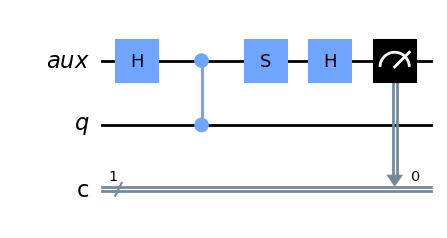

In [3]:
from qiskit.circuit.library.standard_gates import ZGate
hadamard_circuit(ZGate(), add_s_gate =True, measure = True).draw(output='mpl')

#### Coherent vs incoherent phase estimation

Hadamard phase estimation involves repeated Hadamard circuit measurements. There are two approaches we can take:

- Perform a Hadamard test on many copies of identical input states. We label this "incoherent" phase estimation. This approach only works when the state is approximately an eigenstate, but uses shallower circuits. 
- After each Hadamard test measurement, leave the state of the main register as is. This corresponds to "coherent" phase estimation. This approach allows for phase estimation with generic input states, with probability of a phase being measured given by the Born rule. However, this approach has larger circuit depths.

The following function creates the required circuit for coherent phase estimation.

In [10]:
# State of main register is not reset after each measurement. Allows for phase estimation over superpositions.
def coherent_Hadamard_circuit(U, Ncycles):
    """
    Args:
        U (Gate): Unitary gate to measure
        Ncycles: Number of measurements on ancilla qubit for phased and unphased Hadamard test. 
        coherent (bool): Whether to keep state of principal register (True) 
            or reset to original state(False) after each measurement.
    Returns:
        QuantumCircuit that implements a coherent version of the Hadamard test, whereby this we mean the state of the principal register is not reset following measurements.
    """
    hadamard_circ = hadamard_circuit(U, add_s_gate = False, measure = True)
    
    
    # Initialize circuit with first iteration as initial fencepost
    circuit = hadamard_circuit(U, add_s_gate = False, measure = False)
    creg = ClassicalRegister(2*Ncycles, 'c')
    circuit.add_register(creg)
    circuit.measure(0, creg[0])
    circuit.reset(0)
    
    # Perform nonphased measurements
    for k in range(1, Ncycles):
        circuit = circuit.compose(hadamard_circ, qubits = None, clbits = k)
        circuit.reset(0)
        
    hadamard_circ = hadamard_circuit(U, add_s_gate = True, measure = True)
    
    # Perform phased measurements
    for k in range(0, Ncycles):
        circuit = circuit.compose(hadamard_circ, qubits = None, clbits = k + Ncycles)
        circuit.reset(0)
    
    return circuit

We demonstrate this construction for $U = \text{SWAP}$.

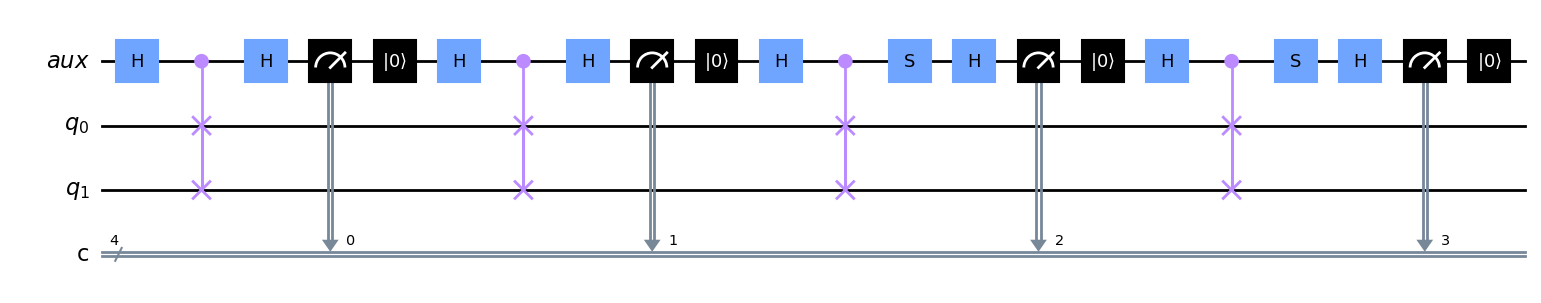

In [12]:
circuit = coherent_Hadamard_circuit(SwapGate(), 2)
circuit.draw(output = 'mpl')

Using `Ncycles = 2` is typically too short to get a good estimate, but we wanted to make the circuit easy to visualize. 

#### Hadamard phase estimation.

Below is a function to perform Hadamard phase estimation, either coherent or incoherent. 

In [11]:
def Hadamard_phase_estimation(U, Uprep = None, precision = 2 * 10**-1, coherent = False, confidence_factor = 2):
    """
    Args:
        U (Gate): Unitary gate for generating phase
        Uprep (Instruction): Prepares state on main register. Should have large overlap with desired eigenvalues.
        precision (float): Desired precision of phase. 
            Achieving results well outside of precision has exponentially vanishing probability. 
        coherent (bool): Whether to keep state of principal register (True) 
            or reset to original state(False) after each measurement.
    Returns:
        An estimate for the phase with specified precision, to confidence ~70%.
            Large deviations from precision are statistically unlikely.
    """
    Ncycles = int(confidence_factor//(precision**2))
    
    # Do single shot, coherent phase estimation if coherent = True
    if coherent:
        phase_estimation_circuit = coherent_Hadamard_circuit(U, Ncycles)
        # Perform state prep, if any
        if Uprep != None: phase_estimation_circuit.compose(Uprep, qubits = range(1,U.num_qubits + 1), front = True, inplace = True)
        # Run circuit
        job = Sampler().run(phase_estimation_circuit, shots = 1)
        result_dict = job.result().quasi_dists[0].binary_probabilities()
        measurements = list(job.result().quasi_dists[0].binary_probabilities())[0]
        
        # Split results into phased and unphased measurements
        phased_measurements = measurements[0:Ncycles]
        unphased_measurements = measurements[Ncycles:2*Ncycles]

        
        # Compute Hamming weight to get counts
        phased_counts = np.sum(list(map(int,phased_measurements)))
        unphased_counts = np.sum(list(map(int,unphased_measurements)))
        
        # Extract Pr(0)
        unphased_p0 = 1 - unphased_counts/Ncycles
        phased_p0 = 1 - phased_counts/Ncycles
    else:  
        # Otherwise, do incoherent phase estimation
        unphased_circuit = hadamard_circuit(U, add_s_gate = False, measure = True)
        phased_circuit = hadamard_circuit(U, add_s_gate = True, measure = True)
        # Do state prep, if any
        if Uprep != None:
            unphased_circuit = unphased_circuit.compose(Uprep, range(1,unphased_circuit.num_qubits),front = True)
            phased_circuit = phased_circuit.compose(Uprep, range(1,unphased_circuit.num_qubits), front = True)

        # Run circuits
        unphased_results = Sampler().run(unphased_circuit, shots = Ncycles).result().quasi_dists[0]
        phased_results = Sampler().run(phased_circuit, shots = Ncycles).result().quasi_dists[0]

        # Extract Pr(0)
        unphased_p0 = unphased_results.get(0, 0)
        phased_p0 = phased_results.get(0, 0)

    
    # Get cosine and sine of phase
    costheta = 2*unphased_p0 - 1
    sintheta = 1- 2*phased_p0
    
    #Extract phase as final result
    theta = np.arctan2(sintheta, costheta)
    # Make branch correction to [0, 2 pi)
    if theta < 0: theta += 2*np.pi
    # Return number between 0,1
    theta = theta/(2*np.pi)
    return theta

As an example, we do a coherent Hadamard phase estimation using the SWAP gate. our initial state $\vert01\rangle$ is an equal superposition of a symmetric (+1) and antisymmetric (-1) eigenstate of SWAP. Therefore, we will measure phases of $0$ or $.5$, each with 50% probability.

In [106]:
# Prepare a superposition of symmetric.
prep_circuit = QuantumCircuit(2)
prep_circuit.x([0,1])
prep_circuit.h(0)
prep_circuit.cx(0,1)

Uprep = prep_circuit.to_gate()

## Kitaev Phase Estimation Algorithm

### References
- Svore, Hastings, Freedman, "[Faster Phase Estimation](https://arxiv.org/abs/1304.0741),"
- Kitaev, Shen, Vyalvi, "[Classical and Quantum Computation](https://bookstore.ams.org/gsm-47#:~:text=This%20book%20is%20an%20introduction,of%20complexity%20of%20an%20algorithm.)" page 125-130

### Characteristics

Iterative:Yes \
Adaptive: No \
Coherent: Optional \
Qubit overhead: $1$ auxiliary qubit \
Runtime: $O(1/\epsilon)$ \
Maximum depth: $O(1/\epsilon)$

### Overview

The Kitaev phase estimation algorithm (KPEA) is simply the Hadamard test repeated with certain multiples of the phase, followed by classical post processing on the resulting data. Thus, the "quantum" part of the algorithm is essentially unchanged. For this reason, sometimes the previously described "Hadamard Phase Estimation" is described as Kitaev Phase Estimation (as is done in Nielsen and Chuang, problem 5.3). Here we use "Kitaev" to refer to the procedure described here. 

Remarkably, KPEA achieves higher accuracies than Hadamard phase estimation while still using only a single auxiliary qubit. This low spatial overhead makes KPEA a noteworthy alternative to standard phase estimation, especially when the number of available qubits is small. Moreover, the classical post processing is simple and efficient to perform. 

The basic idea of the KPEA is as follows. We estimate $\theta_j = 2^j \theta$ for $j = 0,1, \dots, m$, to precision $1/16$. The choice of $1/16$ is for technical reasons, but the point is that this accuracy is a constant, independent of our final desired precision in esti. Note that we can obtain $\theta_j$ by running the Hadamard phase estimation procedure on unitary $U_j = U^{2_j}$.  

### Circuit diagram
**Basically the same as Hadamard, could show multiple in parallel and then a laptop gif receiving the information.**

### Pseudocode

### Qiskit Implementation

First define a function `distance_mod1` for later convenience. This essentially computes the distance between two points on a circle of circumference $1$. 

In [107]:
# inputs $x, y$ are assumed floats in range [0,1]
def distance_mod1(x,y):
    return np.min([np.abs(x-y), 1-np.abs(x-y)])

Next, we define the protocol. 

In [131]:
def Kitaev_phase_estimation(U, Uprep = None, precision = 10**-2, coherent = False):
    # Parameters of precision
    nbits = int(np.ceil(np.log2(1/precision)))
    nreps = nbits - 2
    
    # Perform Hadamard phase estimation on U**(2**j) to fixed precision
    phases = np.zeros(nreps)
    for j in range(nreps):
        phases[j] = Hadamard_phase_estimation(U.repeat(2**j), Uprep, precision = 1/16, coherent = False)
    
    # Classical part to amplify precision
    beta = [0]*nreps
    for j in range(nreps):
        # Round to nearest octant in [0,1)
        beta[j] = (int(np.round(8*phases[j]))%8)/8
    #Retrieve last 3 bits in binary form
    last_bits = bin(int(beta[j]*8))[2:]
    last_bits = beta[nreps - 1]= '0'*(3-len(last_bits)) + last_bits # pad with zeros to get bbb format 
    # Do alpha recursion for remaining bits
    alpha = [0]*nbits
    alpha[nreps + 1]= int(beta[nreps-1][2])
    alpha[nreps] = int(beta[nreps-1][1])
    alpha[nreps-1] = int(beta[nreps-1][0])
    for j in range(nreps-2,-1,-1):
        # fill in the values of alpha
        alpha[j] = int(distance_mod1(beta[j], .5 + alpha[j+1]/4 + alpha[j+2]/8) <.25)
    
    print(alpha)
    return np.sum(alpha * (2.0**(-np.arange(1, nbits+1))))

In [130]:
print(Kitaev_phase_estimation(SwapGate(), Uprep = prep_circuit))

nreps: 5
0.5043508088527306
0.9944070125128028
0.9919248495046797
0.0
0.9968919001928689
0.5
0.0
0.0
0.0
0.0
1
0.5
[1, 0, 0, 0, 0, 0, 0]
0.5


## Fast Phase Estimation

## Adaptive Phase Estimation

## Applications

### Shor's order finding algorithm

Phase estimation is used in Shor's algorithm for order finding (which, by number theoretic techiques, can be related to factoring). The unitary $U$ acts on the computational basis as 

$$
U\vert y\rangle = \vert xy\; (\mathrm{mod} N)\rangle
$$
where $N > 0$ and $x < N$ are integers relevant to the problem. The input state is $\vert1\rangle$, which is a uniform superposition of the eigenstates of $U$. Thus, any coherent phase estimation procedure can determine one of the phases of $U$. These phases contain information about the order of $x$ with respect to $N$. 

### Eigenvalues of Hermitian operators

For any Hermitian operation $H$, the collection of unitary matrices $U(t) = e^{i H t}$ is unitary for any $t \in \mathbb{R}$. Thus, performing phase estimation on $U(t)$ gives an eigenvalue of $H t$ modulo $2\pi$. By choosing $t$ such that $\vert E t\vert < \pi/2$ for the eigenvalue(s) $E$ of interest, the eigenvalue can be determined unambiguously. 

### Physics and chemistry

A special case of the preceding application, which deserves special attention. In any quantum mechanical system, an important Hermitian operator is the Hamiltonian $H$, whose eigenvalues may be interpreted as the allowed energies of the system. Moreover, the unitary $U(t) = e^{-i H t}$ is the operator which evolves the system in time. By performing phase estimation with $U(t)$ for suitable choices of $t$, and for a given initial state, the system energies may be estimated. 

### Solving Linear Systems

In the Harrow Hassidim Lloyd (HHL) algorithm for solving the linear systems $A x = b$ uses phase estimation as a subroutine. In particular, the relevant Hermitian operator is (in block diagonal form)

$$
C = \begin{pmatrix} 
0 & A \\
A^\dagger & 0
\end{pmatrix}.
$$

## Final remarks

## See also

- 